# Crime Forecasts with Prophet

## **Introduction**

This page presents crime forecasting results for **Los Angeles, San Diego, and San Francisco** using the **Prophet time-series model**.
Forecasts are generated from pre-computed Prophet output (CSV files), allowing us to visualize trends without retraining the model.

The charts include:

* 30-day forecast comparison across the three cities
* Actual vs. predicted crime counts
* Forecast confidence intervals
* Seasonal components (yearly, weekly, daily)

These visualizations provide a quick overview of how crime patterns evolve over time and how Prophet captures long-term trends and seasonality.


In [2]:
# ============================================================
# Build correct DAILY crime counts for LA, SD, SF
# ============================================================

import pandas as pd

# ===== 1. Load raw CSVs =====
df_la_raw = pd.read_csv("data/los_angeles.csv")
df_sd_raw = pd.read_csv("data/san_diego.csv")
df_sf_raw = pd.read_csv("data/san_francisco.csv", low_memory=False)

# ===== 2. Convert to datetime =====
df_la_raw["incident_date"] = pd.to_datetime(df_la_raw["incident_date"], errors="coerce")
df_sd_raw["incident_date"] = pd.to_datetime(df_sd_raw["incident_date"], errors="coerce")
df_sf_raw["incident_date"] = pd.to_datetime(df_sf_raw["incident_date"], errors="coerce")

# ===== 3. Drop invalid dates =====
df_la_raw = df_la_raw.dropna(subset=["incident_date"])
df_sd_raw = df_sd_raw.dropna(subset=["incident_date"])
df_sf_raw = df_sf_raw.dropna(subset=["incident_date"])

# ===== 4. Extract PURE DATE (remove hours/min/sec) =====
df_la_raw["date"] = df_la_raw["incident_date"].dt.date
df_sd_raw["date"] = df_sd_raw["incident_date"].dt.date
df_sf_raw["date"] = df_sf_raw["incident_date"].dt.date

# ===== 5. Group by daily counts =====
daily_la = (
    df_la_raw.groupby("date")
    .size()
    .reset_index(name="y")
    .rename(columns={"date": "ds"})
)

daily_sd = (
    df_sd_raw.groupby("date")
    .size()
    .reset_index(name="y")
    .rename(columns={"date": "ds"})
)

daily_sf = (
    df_sf_raw.groupby("date")
    .size()
    .reset_index(name="y")
    .reset_index()
    .rename(columns={"date": "ds"})
)

# (Fix SF: previous code mis-grouped, correct version below)
daily_sf = (
    df_sf_raw.groupby("date")
    .size()
    .reset_index(name="y")
    .rename(columns={"date": "ds"})
)


# Daily Crime Comparison — LA vs SD vs SF

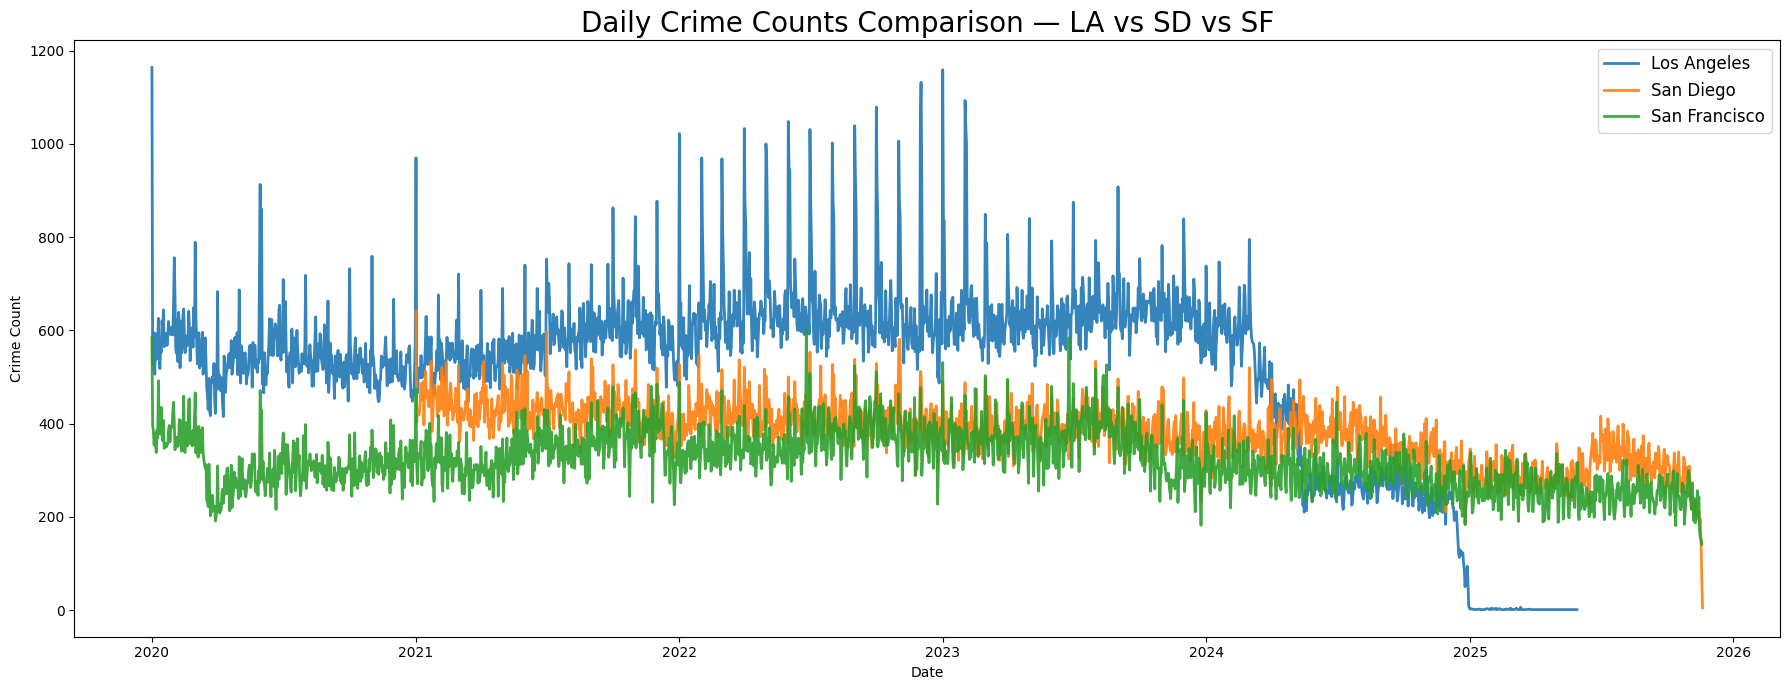

In [12]:
# ============================================================
# Daily Crime Comparison — LA vs SD vs SF
# ============================================================

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 7))

plt.plot(daily_la["ds"], daily_la["y"], label="Los Angeles", linewidth=2, alpha=0.9)
plt.plot(daily_sd["ds"], daily_sd["y"], label="San Diego", linewidth=2, alpha=0.9)
plt.plot(daily_sf["ds"], daily_sf["y"], label="San Francisco", linewidth=2, alpha=0.9)

plt.title("Daily Crime Counts Comparison — LA vs SD vs SF", fontsize=20)
plt.xlabel("Date")
plt.ylabel("Crime Count")
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


## Forecast — Los Angeles Crime (Prophet)

In [3]:
# ============================================================
# Forecast — Los Angeles Crime (Prophet)
# ============================================================

from prophet import Prophet

# Prophet requires ds as datetime, convert if needed
daily_la["ds"] = pd.to_datetime(daily_la["ds"])

m_la = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    interval_width=0.9,
)

m_la.fit(daily_la)

future_la = m_la.make_future_dataframe(periods=30)
forecast_la = m_la.predict(future_la)

forecast_la[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()


16:07:16 - cmdstanpy - INFO - Chain [1] start processing
16:07:16 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1904,2025-06-24,-171.178043,-290.385998,-53.506957
1905,2025-06-25,-158.073769,-280.798630,-41.070775
1906,2025-06-26,-161.695290,-286.405748,-43.864730
1907,2025-06-27,-119.476412,-236.855705,4.296271
1908,2025-06-28,-141.978940,-268.461451,-19.821021


## Forecast — San Francisco Crime (Prophet)

In [4]:
# ============================================================
# Forecast — San Francisco Crime (Prophet)
# ============================================================

from prophet import Prophet

# Ensure datetime format
daily_sf["ds"] = pd.to_datetime(daily_sf["ds"])

m_sf = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    interval_width=0.9,
)

m_sf.fit(daily_sf)

future_sf = m_sf.make_future_dataframe(periods=30)
forecast_sf = m_sf.predict(future_sf)

forecast_sf[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()


16:08:03 - cmdstanpy - INFO - Chain [1] start processing
16:08:04 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
2174,2025-12-14,185.450937,122.147622,247.501477
2175,2025-12-15,206.020712,145.693384,269.989910
2176,2025-12-16,208.902863,148.870077,268.741471
2177,2025-12-17,226.950089,163.778228,290.599244
2178,2025-12-18,213.829829,145.745018,275.530323


## Forecast — San Diego Crime (Prophet, Normal Mode)

In [5]:
# ============================================================
# Forecast — San Diego Crime (Prophet, Normal Mode)
# ============================================================

from prophet import Prophet

# Ensure datetime format
daily_sd["ds"] = pd.to_datetime(daily_sd["ds"])

m_sd = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    interval_width=0.9,
)

m_sd.fit(daily_sd)

future_sd = m_sd.make_future_dataframe(periods=30)
forecast_sd = m_sd.predict(future_sd)

forecast_sd[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()


16:08:23 - cmdstanpy - INFO - Chain [1] start processing
16:08:23 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1809,2025-12-15,243.013641,184.147838,303.632784
1810,2025-12-16,237.511433,175.041508,296.710928
1811,2025-12-17,246.504209,190.669433,306.445333
1812,2025-12-18,248.197095,188.653083,312.900915
1813,2025-12-19,273.766830,215.126359,334.085607


## Save Forecast Results as CSV for All 3 Cities

In [6]:
# ============================================================
# Save Forecast Results as CSV for All 3 Cities
# ============================================================

# Only keep the useful columns
cols = ["ds", "yhat", "yhat_lower", "yhat_upper"]

# LA
forecast_la_out = forecast_la[cols]
forecast_la_out.to_csv("data/los_angeles_forecast.csv", index=False)

# SD
forecast_sd_out = forecast_sd[cols]
forecast_sd_out.to_csv("data/san_diego_forecast.csv", index=False)

# SF
forecast_sf_out = forecast_sf[cols]
forecast_sf_out.to_csv("data/san_francisco_forecast.csv", index=False)


forecast_la_out.tail()


,ds,yhat,yhat_lower,yhat_upper
1904,2025-06-24,-171.178043,-290.385998,-53.506957
1905,2025-06-25,-158.073769,-280.798630,-41.070775
1906,2025-06-26,-161.695290,-286.405748,-43.864730
1907,2025-06-27,-119.476412,-236.855705,4.296271
1908,2025-06-28,-141.978940,-268.461451,-19.821021


# Forecast Comparison — LA vs SD vs SF

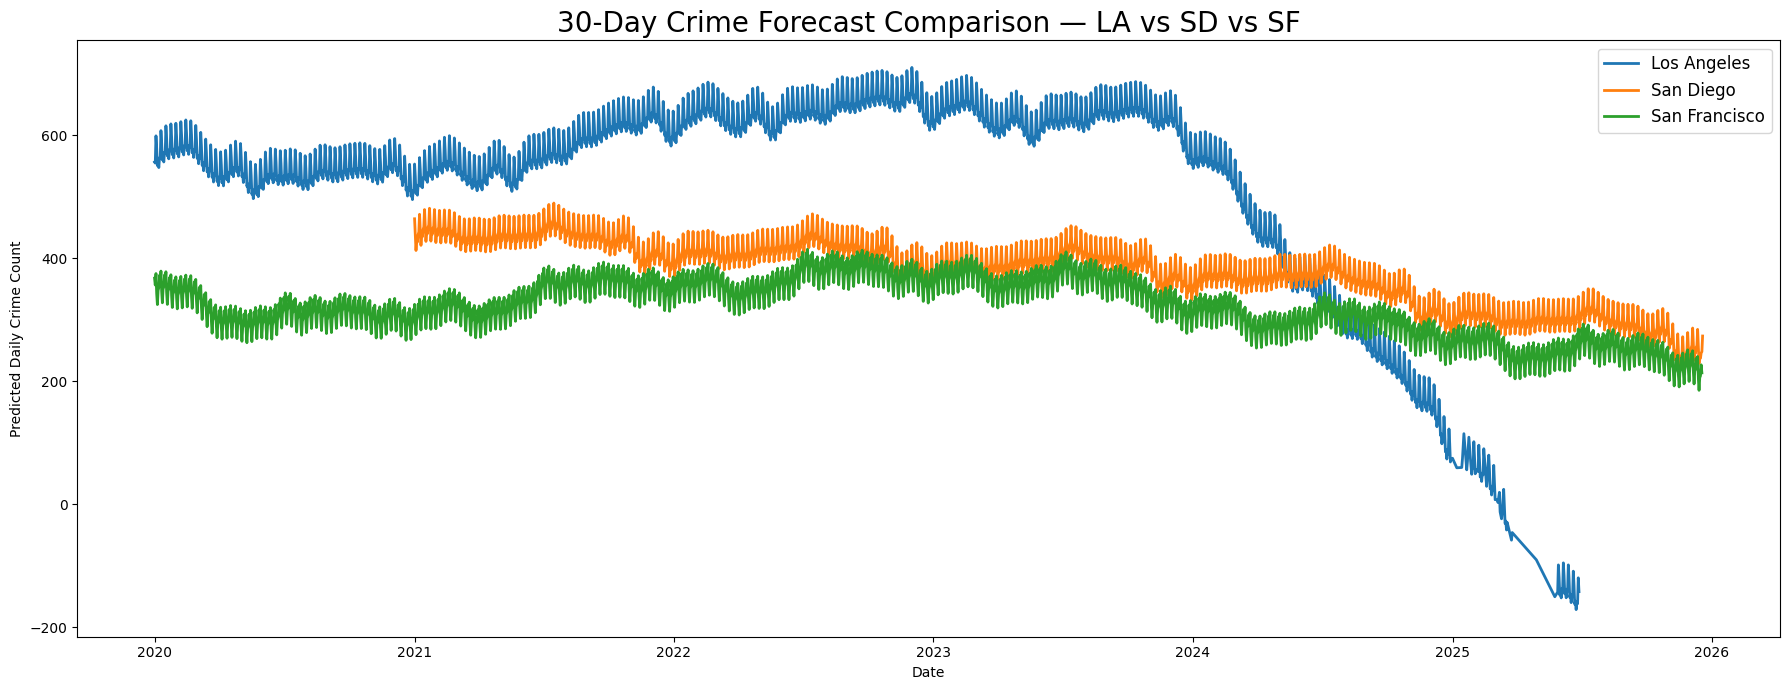

In [17]:
# ============================================================
# Forecast Comparison — LA vs SD vs SF
# ============================================================

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 7))

plt.plot(forecast_la["ds"], forecast_la["yhat"], label="Los Angeles", linewidth=2)
plt.plot(forecast_sd["ds"], forecast_sd["yhat"], label="San Diego", linewidth=2)
plt.plot(forecast_sf["ds"], forecast_sf["yhat"], label="San Francisco", linewidth=2)

plt.title("30-Day Crime Forecast Comparison — LA vs SD vs SF", fontsize=20)
plt.xlabel("Date")
plt.ylabel("Predicted Daily Crime Count")
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


# Actual vs Forecast — Los Angeles / San Diego / San Francisco

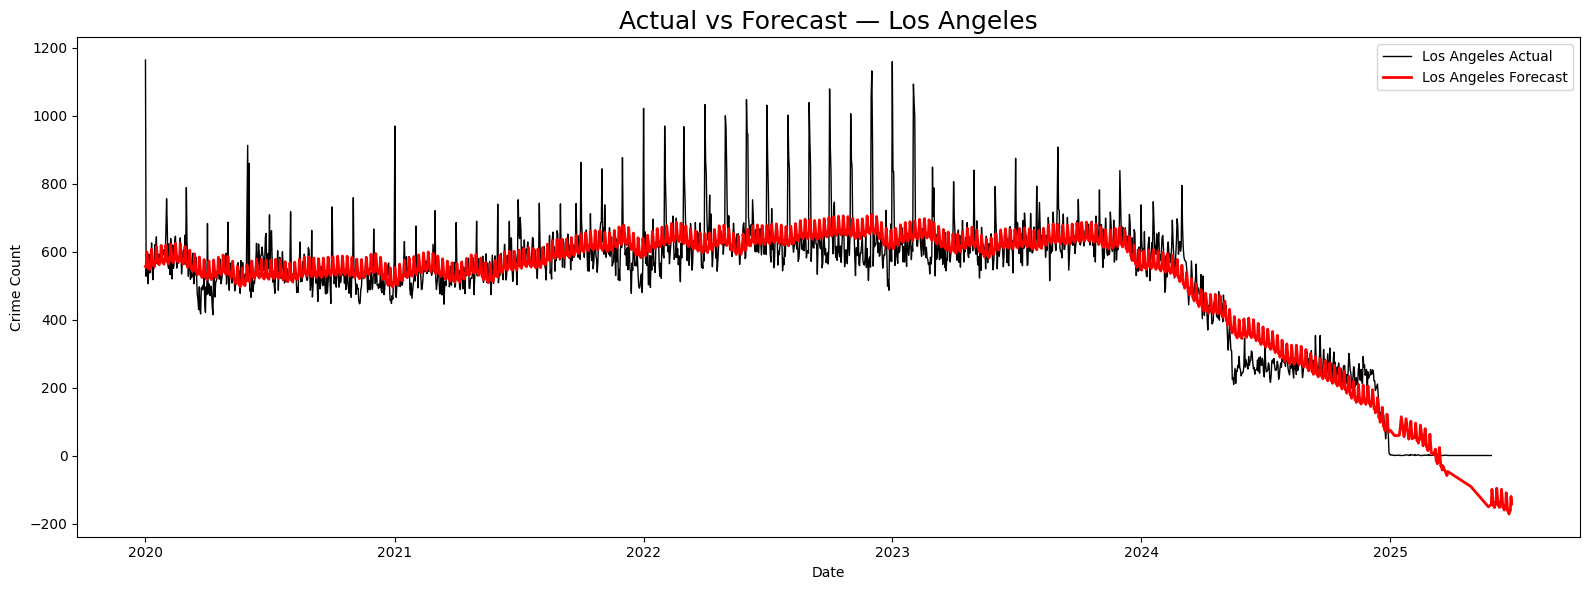

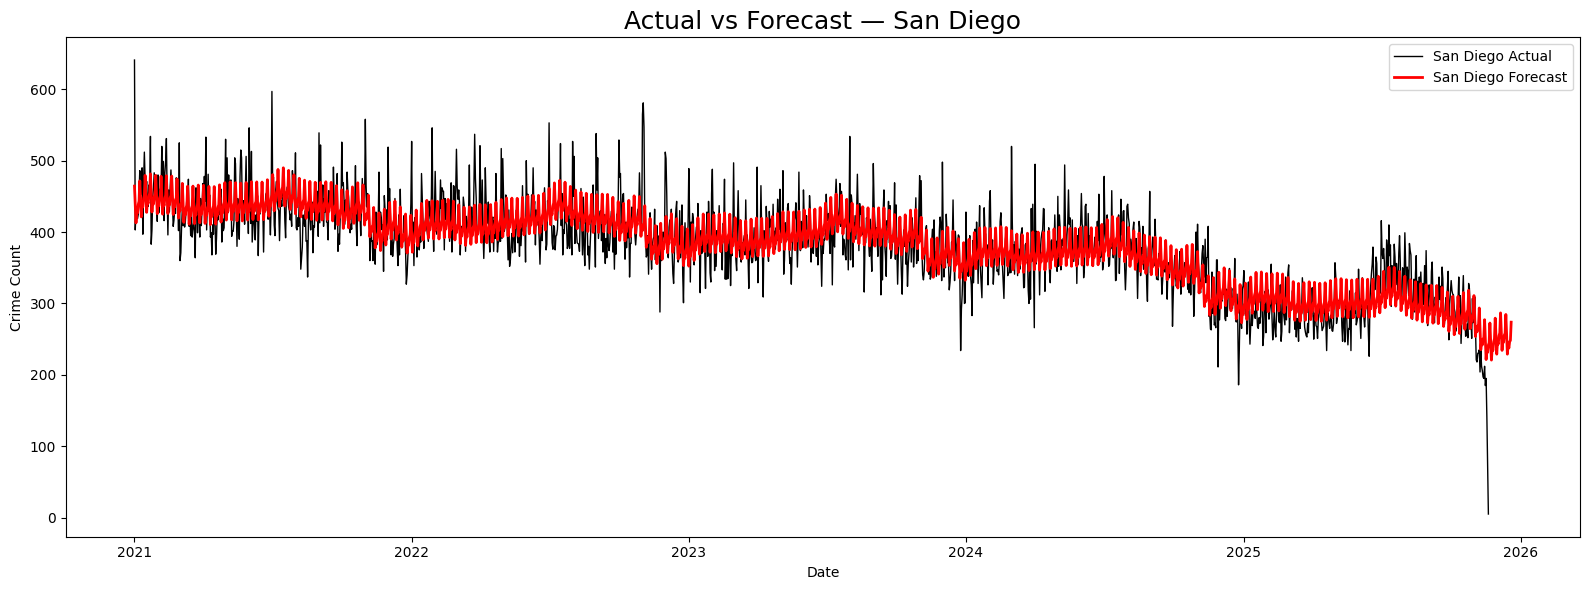

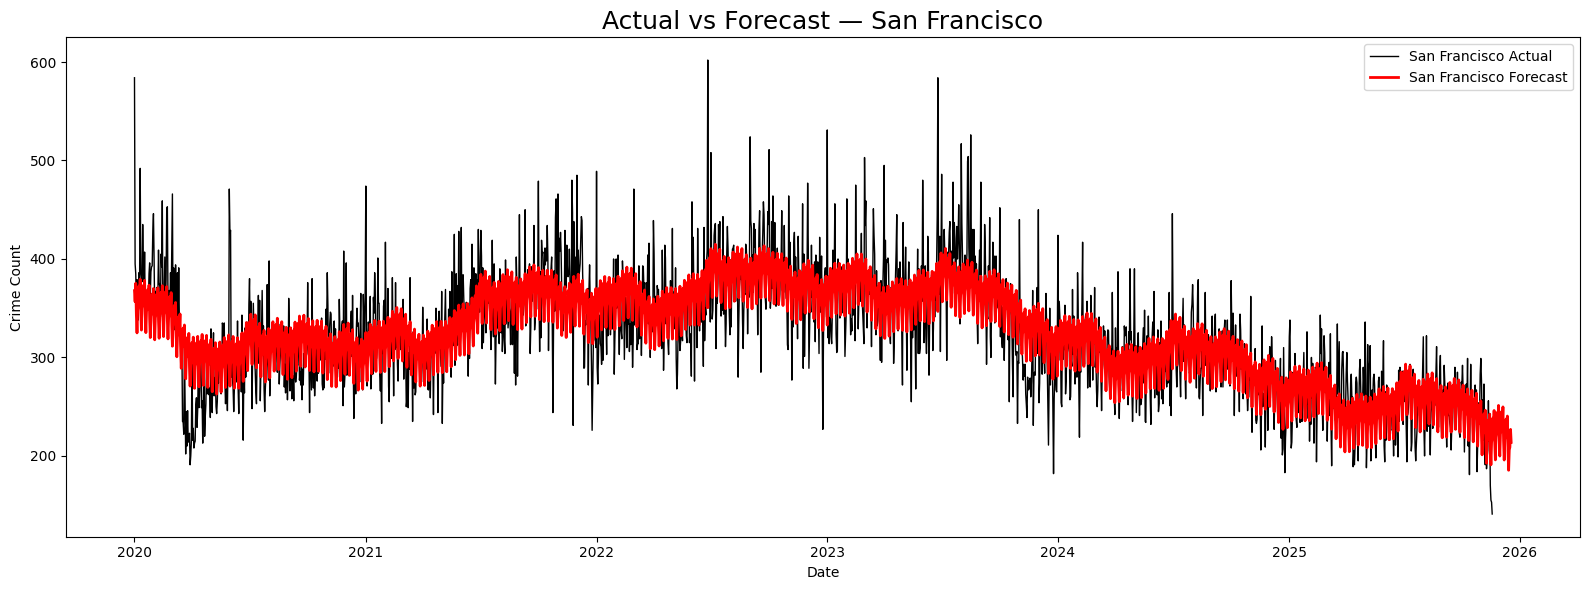

In [18]:
# ============================================================
# Actual vs Forecast — Los Angeles / San Diego / San Francisco
# ============================================================

import matplotlib.pyplot as plt


def plot_actual_vs_forecast(daily_df, forecast_df, city_name):
    plt.figure(figsize=(16, 6))

    # actual
    plt.plot(
        daily_df["ds"],
        daily_df["y"],
        label=f"{city_name} Actual",
        color="black",
        linewidth=1,
    )

    # forecast
    plt.plot(
        forecast_df["ds"],
        forecast_df["yhat"],
        label=f"{city_name} Forecast",
        color="red",
        linewidth=2,
    )

    plt.title(f"Actual vs Forecast — {city_name}", fontsize=18)
    plt.xlabel("Date")
    plt.ylabel("Crime Count")
    plt.legend()
    plt.tight_layout()
    plt.show()


# LA
plot_actual_vs_forecast(daily_la, forecast_la, "Los Angeles")

# SD
plot_actual_vs_forecast(daily_sd, forecast_sd, "San Diego")

# SF
plot_actual_vs_forecast(daily_sf, forecast_sf, "San Francisco")


# Forecast with Confidence Interval (yhat_lower, yhat_upper)

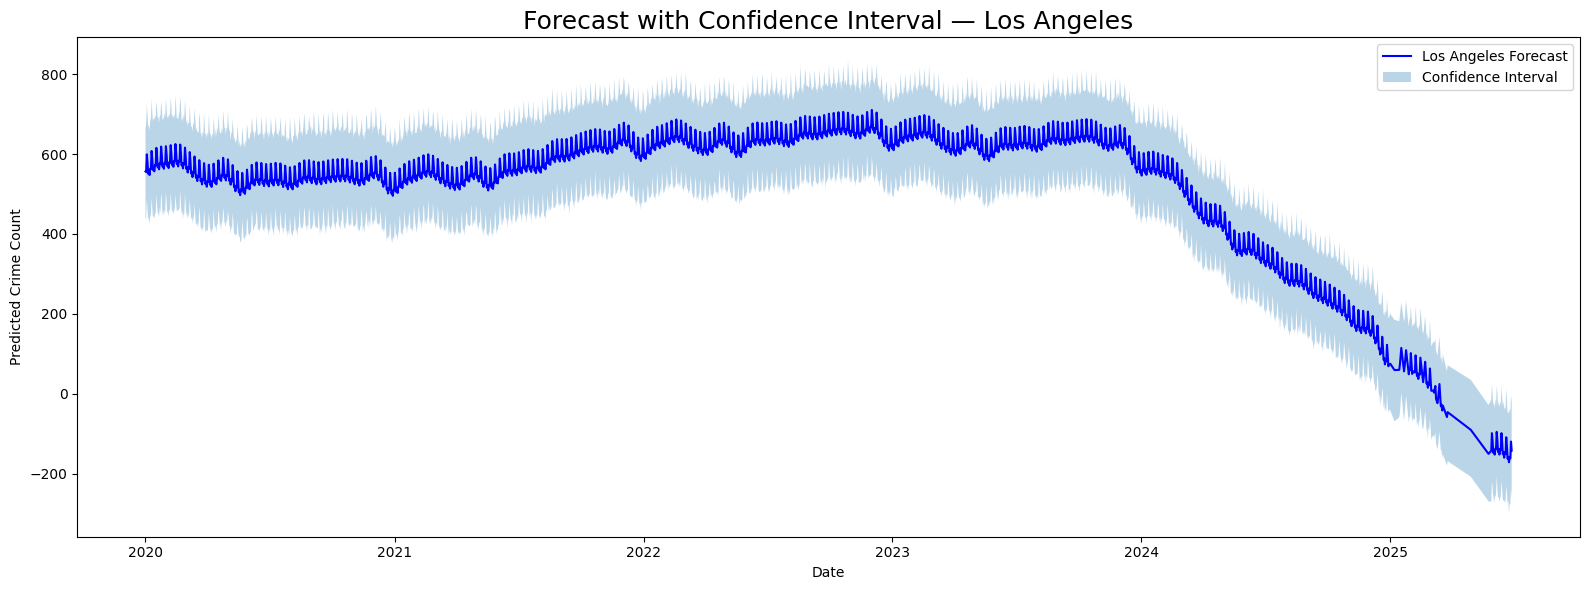

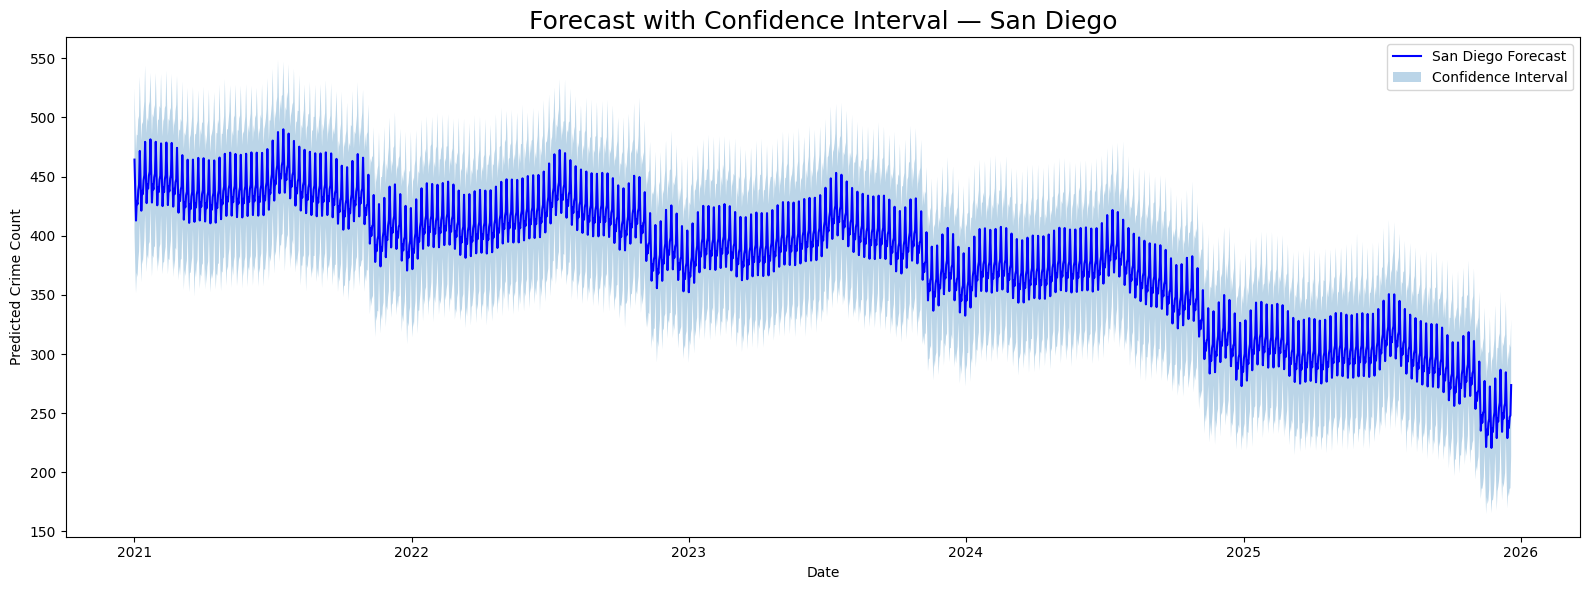

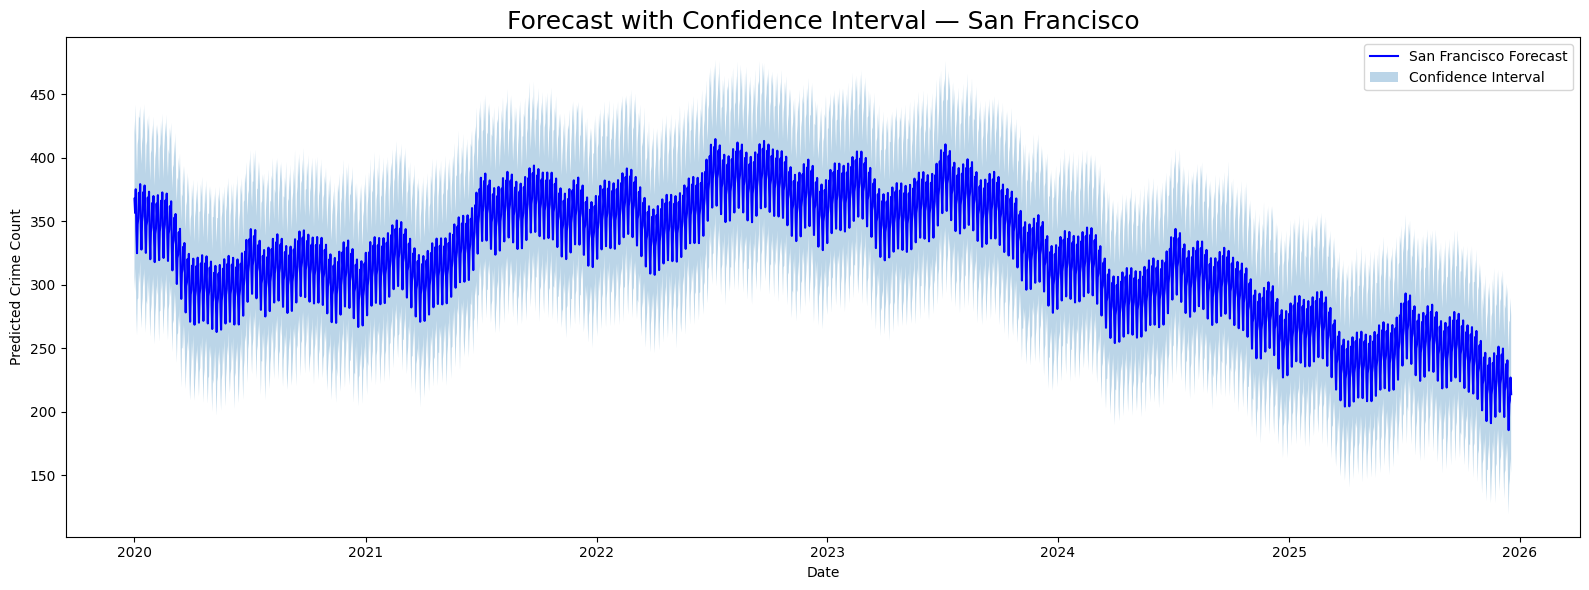

In [19]:
# ============================================================
# Forecast with Confidence Interval (yhat_lower, yhat_upper)
# ============================================================


def plot_forecast_interval(forecast_df, city_name):
    plt.figure(figsize=(16, 6))

    # prediction
    plt.plot(
        forecast_df["ds"],
        forecast_df["yhat"],
        label=f"{city_name} Forecast",
        color="blue",
    )

    # confidence interval shading
    plt.fill_between(
        forecast_df["ds"],
        forecast_df["yhat_lower"],
        forecast_df["yhat_upper"],
        alpha=0.3,
        label="Confidence Interval",
    )

    plt.title(f"Forecast with Confidence Interval — {city_name}", fontsize=18)
    plt.xlabel("Date")
    plt.ylabel("Predicted Crime Count")
    plt.legend()
    plt.tight_layout()
    plt.show()


# LA
plot_forecast_interval(forecast_la, "Los Angeles")

# SD
plot_forecast_interval(forecast_sd, "San Diego")

# SF
plot_forecast_interval(forecast_sf, "San Francisco")


# Prophet Seasonal Components (Trend / Weekly / Yearly)

In [9]:
# ============================================================
# Prophet Seasonal Components (Trend / Weekly / Yearly)
# ============================================================


def plot_prophet_components(model, city_name):
    fig = model.plot_components(model.predict(model.make_future_dataframe(periods=30)))
    fig.set_size_inches(12, 10)


## Los Angeles

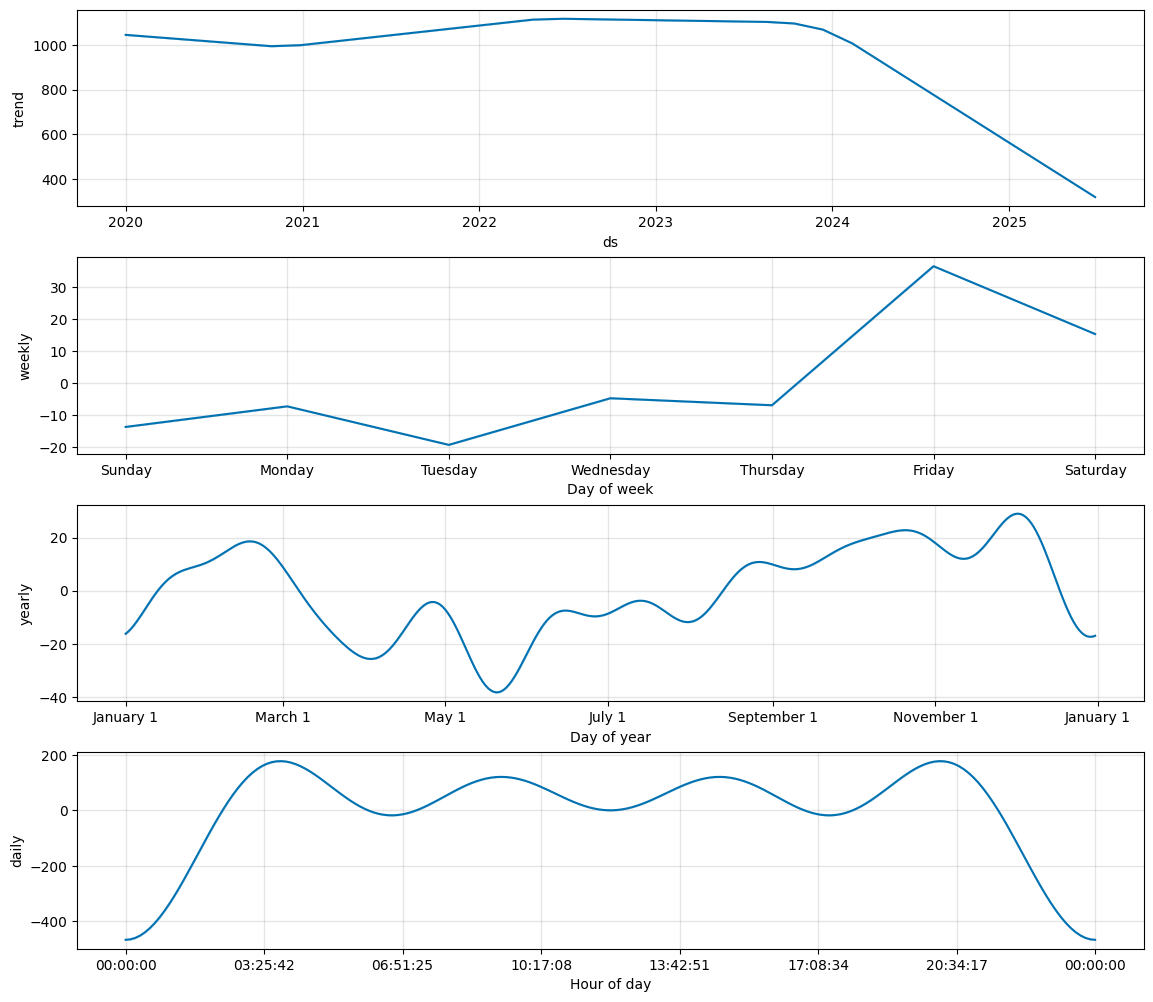

In [10]:
# LA
plot_prophet_components(m_la, "Los Angeles")


## San Diego

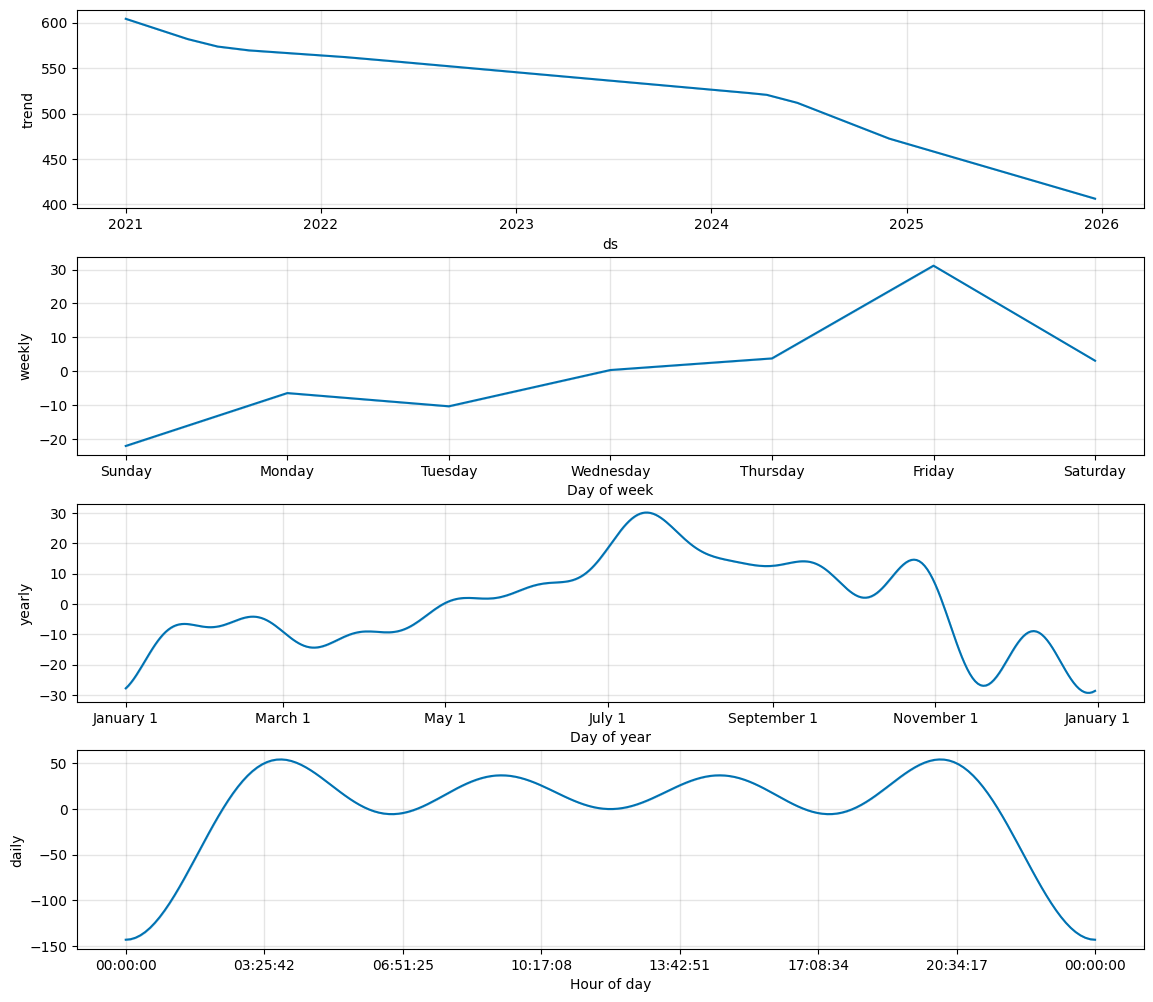

In [11]:
# SD
plot_prophet_components(m_sd, "San Diego")


## San Francisco

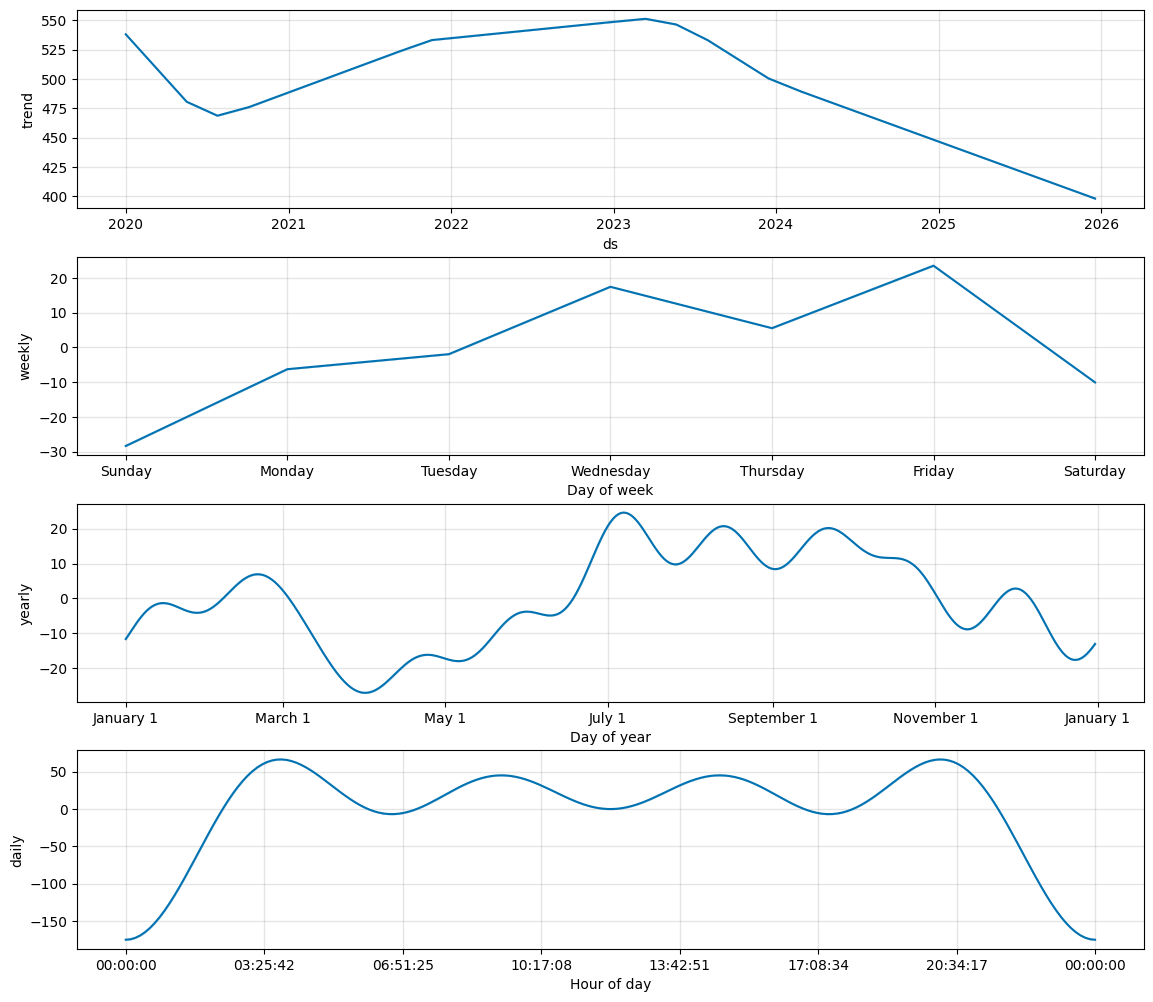

In [12]:
# SF
plot_prophet_components(m_sf, "San Francisco")
